(333, 500, 3)
(333, 500, 2)


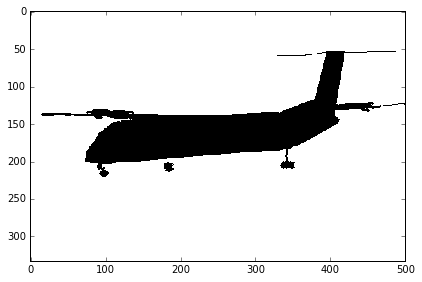

In [1]:
#!/usr/bin/env python

from PIL import Image
%matplotlib inline
#%matplotlib qt

import skimage
import skimage.io
import skimage.transform

import os
import scipy as scp
import scipy.misc

import numpy as np
import tensorflow as tf

import fcn8_vgg_train
import utils

import loss

from tensorflow.python.framework import ops

#os.environ['CUDA_VISIBLE_DEVICES'] = ''

#img1 = skimage.io.imread("./test_data/tabby_cat.png")
img1 = skimage.io.imread("./test_data/19.jpg")
lbl1 = skimage.io.imread("./test_data/labels.png")

FLAGS = tf.app.flags.FLAGS

from skimage import io, img_as_ubyte

obj_array = np.zeros((lbl1.shape[0],lbl1.shape[1]))
bg_array = np.zeros((lbl1.shape[0],lbl1.shape[1]))

print lbl1.shape

obj_array[lbl1[:,:,0] > 0] = 1
bg_array[lbl1[:,:, 0] == 0] = 1

lbl_in = np.array([obj_array, bg_array]).swapaxes(0,2).swapaxes(0,1)


print lbl_in.shape
io.imshow(lbl_in[:,:,1])


In [2]:
with tf.Session() as sess:
    images = tf.placeholder("float")
    labels = tf.placeholder("float")
    feed_dict = {images: img1, labels: lbl_in}
    
    batch_images = tf.expand_dims(images, 0)
    
    batch_labels = tf.expand_dims(labels, 0)


    #print type(batch_images)
    
    #print type(batch_labels)
    
    vgg_fcn = fcn8_vgg_train.FCN8VGG()
    
    
    
    

npy file loaded


In [3]:
    with tf.name_scope("content_vgg"):
        #vgg_fcn.build(batch_images, debug=True)
        
        vgg_fcn.build(batch_images, train=True, num_classes=2, random_init_fc8=True)

    print('Finished building Network.')

    
    init = tf.initialize_all_variables()
    sess.run(tf.initialize_all_variables())

    print('Running the Network')

Finished building Network.
Running the Network


In [4]:
    
    
    logits = vgg_fcn.upscore32
    
    labels = batch_labels

    #down_color = utils.color_image(down[0])
    #up_color = utils.color_image(up[0])

    #scp.misc.imsave('fcn32_downsampled.png', down_color)
    #scp.misc.imsave('fcn32_upsampled.png', up_color)

In [5]:
    
    
    loss = vgg_fcn.loss_study(logits, labels, 2, head=None)
    
    loss_get = sess.run(loss, feed_dict=feed_dict) 
    
    print loss_get
 

12.2698


In [6]:
    train_op = tf.train.AdamOptimizer(0.00005).minimize(loss)
    # Add the ops to initialize variables.  These will include 
    # the optimizer slots added by AdamOptimizer().
    
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    for i in range(100):
      
        loss_get = sess.run(loss, feed_dict=feed_dict) 
        
        
        print("step %d, training accuracy %g"%(i, loss_get))
        sess.run(train_op, feed_dict=feed_dict)

step 0, training accuracy 12.2736
step 1, training accuracy 12.057
step 2, training accuracy 11.8431
step 3, training accuracy 11.6322
step 4, training accuracy 11.4244
step 5, training accuracy 11.2197
step 6, training accuracy 11.0182
step 7, training accuracy 10.8199
step 8, training accuracy 10.6247
step 9, training accuracy 10.4325
step 10, training accuracy 10.2433
step 11, training accuracy 10.0571
step 12, training accuracy 9.87395
step 13, training accuracy 9.69353
step 14, training accuracy 9.5159
step 15, training accuracy 9.3409
step 16, training accuracy 9.16852
step 17, training accuracy 8.99835
step 18, training accuracy 8.83043
step 19, training accuracy 8.66461
step 20, training accuracy 8.50067
step 21, training accuracy 8.33795
step 22, training accuracy 8.17663
step 23, training accuracy 8.01603
step 24, training accuracy 7.85573
step 25, training accuracy 7.69559
step 26, training accuracy 7.5344
step 27, training accuracy 7.37169
step 28, training accuracy 7.20669

In [17]:
    for i in range(500):
      
        loss_get = sess.run(loss, feed_dict=feed_dict) 
        
        
        print("step %d, training accuracy %g"%(i, loss_get))
        sess.run(train_op, feed_dict=feed_dict)  
    
#logits_get, labels_get, cross_entropy_get = sess.run([vgg_fcn.logits, vgg_fcn.labels, vgg_fcn.cross_entropy]) 
    

#print logits_get.shape 
#print labels_get.shape
#print cross_entropy_get.shape

step 0, training accuracy 0.0747245
step 1, training accuracy 0.0720168
step 2, training accuracy 0.0718566
step 3, training accuracy 0.0724076
step 4, training accuracy 0.0717721
step 5, training accuracy 0.0740787
step 6, training accuracy 0.0777244
step 7, training accuracy 0.0725177
step 8, training accuracy 0.0715202
step 9, training accuracy 0.0712285
step 10, training accuracy 0.0775024
step 11, training accuracy 0.0707385
step 12, training accuracy 0.0778318
step 13, training accuracy 0.0757244
step 14, training accuracy 0.0753323
step 15, training accuracy 0.0783738
step 16, training accuracy 0.0766112
step 17, training accuracy 0.0838786
step 18, training accuracy 0.0742568
step 19, training accuracy 0.076266
step 20, training accuracy 0.0732501
step 21, training accuracy 0.0763539
step 22, training accuracy 0.0706362
step 23, training accuracy 0.0724975
step 24, training accuracy 0.0713552
step 25, training accuracy 0.0738456
step 26, training accuracy 0.0698821
step 27, tra

In [14]:
#print up.shape
#print labels_get.shape

In [18]:
#check project image in each layer

#v = sess.run(vgg_fcn.conv5_1, feed_dict=feed_dict) 
v = sess.run(vgg_fcn.pool2, feed_dict=feed_dict) 

In [19]:
print type(v)
print v.shape
v_temp = v[0,:,:,10]
print v_temp.shape

<type 'numpy.ndarray'>
(1, 84, 125, 128)
(84, 125)


/home/irashadow/env_TensorFlow/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


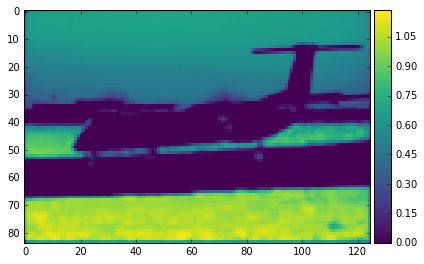

In [20]:
from PIL import Image
%matplotlib inline
#%matplotlib qt

from skimage import io, img_as_ubyte
io.imshow(v_temp)

<type 'numpy.ndarray'>
(1, 11, 16, 2)
(11, 16)


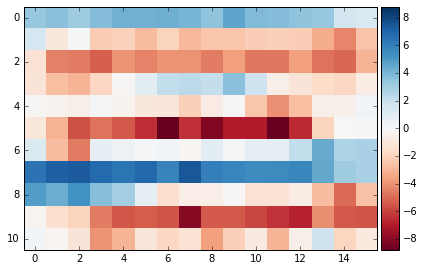

In [21]:
#check project image in each layer

w = sess.run(vgg_fcn.score_fr, feed_dict=feed_dict) 
print type(w)
print w.shape
w_temp = w[0,:,:,1]
print w_temp.shape
io.imshow(w_temp)


<type 'numpy.ndarray'>
(1, 21, 32, 2)
(21, 32)


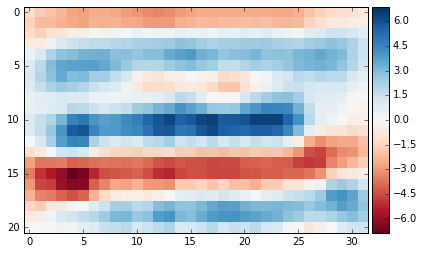

In [22]:
#check project image in each layer
w = sess.run(vgg_fcn.upscore2, feed_dict=feed_dict) 
print type(w)
print w.shape
w_temp = w[0,:,:,0]
print w_temp.shape
io.imshow(w_temp)

<type 'numpy.ndarray'>
(1, 42, 63, 2)
(42, 63)


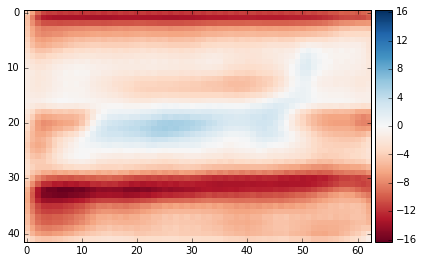

In [23]:
#check project image in each layer
w = sess.run(vgg_fcn.upscore4, feed_dict=feed_dict) 
print type(w)
print w.shape
w_temp = w[0,:,:,0]
print w_temp.shape
io.imshow(w_temp)

<type 'numpy.ndarray'>
(1, 333, 500, 2)
(333, 500)


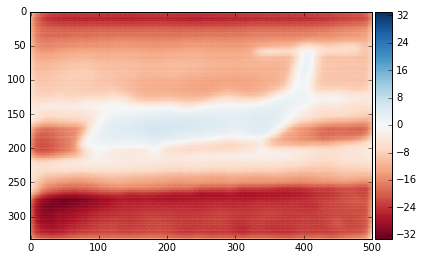

In [35]:
#check project image in each layer
w = sess.run(vgg_fcn.upscore32, feed_dict=feed_dict) 
print type(w)
print w.shape
w_temp = w[0,:,:,0]
print w_temp.shape
io.imshow(w_temp)
 
w_norm = ((w_temp-w_temp.min())/(w_temp.max()-w_temp.min()))    

img = Image.fromarray(img_as_ubyte(w_norm)).convert('RGB')
img.save('./pred_up_8x_1000_loops.png', "PNG", quality=80) 

<type 'numpy.ndarray'>
(1, 333, 500)
(333, 500)


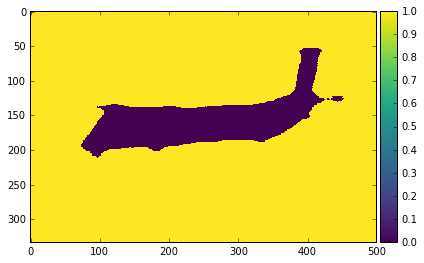

In [25]:
#check project image in each layer
w = sess.run(vgg_fcn.pred_up, feed_dict=feed_dict) 
print type(w)
print w.shape
w_temp = w[0,:,:]
print w_temp.shape
io.imshow(w_temp)

img = Image.fromarray(img_as_ubyte(255-w_temp*255)).convert('RGB')
img.save('./pred_up_8x_1000_loops.png', "PNG", quality=80) 

In [27]:
logits_reshape = np.reshape(w, (-1, 2))


print logits_reshape.shape

sub_data = logits_reshape[10,:]
print sub_data

(166500, 2)
[-2.65825844  2.78694844]


In [58]:
print np.exp(sub_data)

temp_sum = np.sum(np.exp(sub_data))

print np.exp(sub_data)/temp_sum

[ inf  inf]
[ nan  nan]


/home/irashadow/env_TensorFlow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/irashadow/env_TensorFlow/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/irashadow/env_TensorFlow/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/home/irashadow/env_TensorFlow/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


In [11]:
arr=np.array([[[ 6,  9,  4],
        [ 5,  2,  1],
        [10, 15, 30]],

       [[ 9,  0,  1],
        [ 4,  6,  4],
        [ 8,  3,  9]],

       [[ 6,  7,  4],
        [ 0,  1,  6],
        [ 4,  0,  1]]])

In [12]:
print arr

[[[ 6  9  4]
  [ 5  2  1]
  [10 15 30]]

 [[ 9  0  1]
  [ 4  6  4]
  [ 8  3  9]]

 [[ 6  7  4]
  [ 0  1  6]
  [ 4  0  1]]]


In [21]:
coord = np.where((arr[:,:,0]==10) & (arr[:,:,1]==15) & (arr[:,:,2]==30))

In [22]:
print coord

(array([0]), array([2]))
